# Nim : 231351011
# Nama : Ahmad Rizki Sabani
# Kelas : Pagi A

## Import Library

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Load Dataset

In [2]:
df =pd.read_csv('kalori_ganda.csv')

## EDA

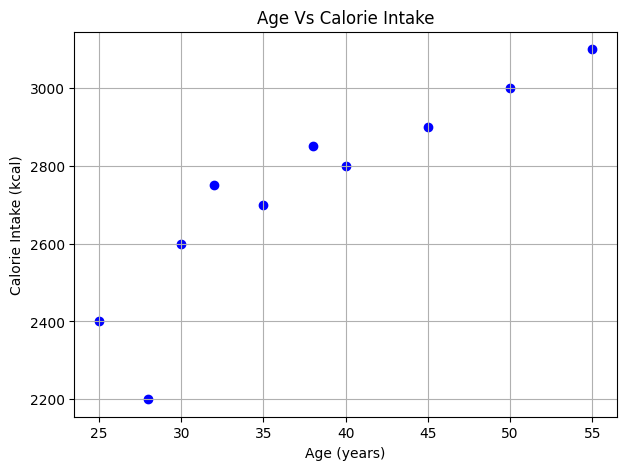

In [3]:
plt.figure(figsize=(7,5))
plt.scatter(x="Umur", y="Kalori", data=df, color="blue" )
plt.title("Age Vs Calorie Intake")
plt.xlabel("Age (years)")
plt.ylabel("Calorie Intake (kcal)")
plt.grid(True)
plt.show()

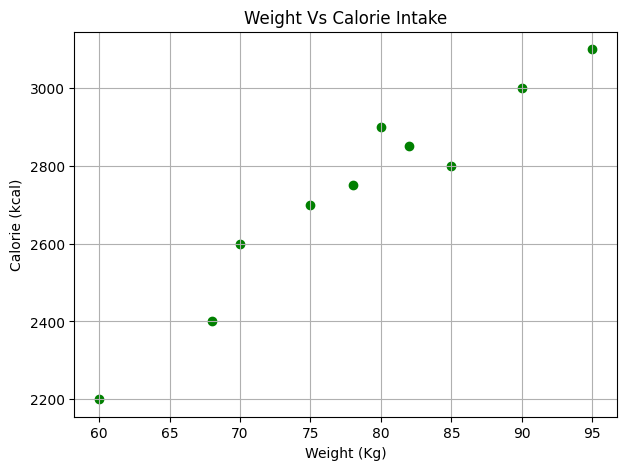

In [4]:
plt.figure(figsize=(7,5))
plt.scatter(x="BB", y="Kalori", data=df, color="green")
plt.title("Weight Vs Calorie Intake")
plt.xlabel("Weight (Kg)")
plt.ylabel("Calorie (kcal)")
plt.grid(True)
plt.show()

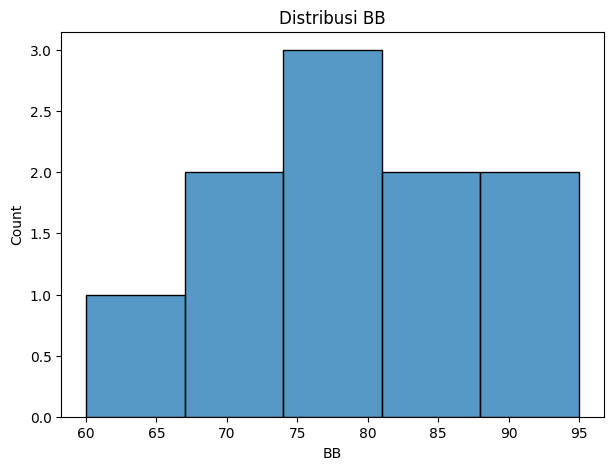

In [5]:
# histogram distribusi BB
plt.figure(figsize=(7,5))
sns.histplot(x="BB", data=df)
plt.title("Distribusi BB")
plt.show()

In [6]:
# plot animasi 3d
fig = px.scatter_3d(df,x="Umur", y="BB", z="TB", color="Olahraga", size="Kalori", hover_name="Umur")
fig.show()

## tentukan nilai input  (X) dan output/label(Y)

In [7]:
x = df[['Umur', 'BB', 'TB', 'Olahraga']]
y = df['Kalori']

## Split data training dan testing

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42
)

## masukan algoritma


In [9]:
model = LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
intercept = model.intercept_
intercept

np.float64(854.3029739002104)

In [11]:
coefficients = model.coef_
coefficients

array([ 3.05138649, 22.34269713,  0.0466017 ,  0.06622248])

In [12]:
manual = intercept+(25*3.05138649)+(75*22.34269713)+(170*0.0466017)+(60*0.06622248)
manual

np.float64(2618.1855587002105)

In [13]:
# Data Input untuk Prediksi
input_data = np.array([[25,75,170,60]])

In [14]:
# Melakukan Prediksi
predicated_calories = model.predict(input_data)
predicated_calories

c:\Users\saban\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([2618.18555887])

In [ ]:
y_pred = model.predict(x_test) 

## Akurasi Testing

In [16]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [17]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 4792.391825718517
R-squared (R2): -6.667826921149627


In [18]:
# menyimpan model menggunakan pickle
import pickle
filename = 'regression_model.pkl'
pickle.dump(model,open(filename, 'wb'))